In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor # Our DEcision Tree classifier
from sklearn import preprocessing,svm

In [2]:
df = pd.read_csv('C:/all_stocks_2006-01-01_to_2018-01-01.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [3]:
df.Date = pd.to_datetime(df.Date)
df.describe()

,Open,High,Low,Close,Volume
count,93587.000000,93602.000000,93592.000000,93612.000000,9.361200e+04
mean,85.623260,86.387045,84.836664,85.641753,2.015667e+07
std,108.151723,108.956365,107.225361,108.121106,3.442108e+07
min,6.750000,7.170000,0.000000,6.660000,0.000000e+00
25%,33.950000,34.290000,33.600000,33.960000,5.040180e+06
50%,60.040000,60.630000,59.490000,60.050000,9.701142e+06
75%,94.000000,94.740000,93.250000,94.012500,2.075222e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,8.432640e+08


In [4]:
df.isnull().sum()
df[df.Open.isnull()]

,Date,Open,High,Low,Close,Volume,Name
2913,2017-07-31,NaN,201.66,NaN,201.17,1833625,MMM
5933,2017-07-31,NaN,85.70,NaN,85.23,3079797,AXP
11972,2017-07-31,NaN,NaN,NaN,242.46,5777271,BA
14992,2017-07-31,NaN,NaN,NaN,113.95,4486013,CAT
18012,2017-07-31,NaN,110.00,NaN,109.19,7561205,CVX
24051,2017-07-31,NaN,NaN,45.79,45.84,13622891,KO
25815,2012-08-01,NaN,NaN,NaN,49.14,0,DIS
27071,2017-07-31,NaN,110.14,NaN,109.93,6815349,DIS
30091,2017-07-31,NaN,80.39,NaN,80.04,12820175,XOM
33111,2017-07-31,NaN,25.69,NaN,25.61,30616287,GE


In [5]:
rng = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')
rng[~rng.isin(df.Date.unique())]

DatetimeIndex(['2006-01-02', '2006-01-16', '2006-02-20', '2006-04-14',
               '2006-05-29', '2006-07-04', '2006-09-04', '2006-11-23',
               '2006-12-25', '2007-01-01',
               ...
               '2017-01-02', '2017-01-16', '2017-02-20', '2017-04-14',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23',
               '2017-12-25', '2018-01-01'],
              dtype='datetime64[ns]', length=111, freq=None)

In [6]:
df.groupby('Name').count().sort_values('Date', ascending=False)['Date']

Name
JNJ      3020
JPM      3020
WMT      3020
VZ       3020
UTX      3020
UNH      3020
TRV      3020
PG       3020
PFE      3020
NKE      3020
MMM      3020
MCD      3020
KO       3020
XOM      3020
GE       3020
IBM      3020
HD       3020
GS       3020
AXP      3020
BA       3020
CAT      3020
DIS      3020
CVX      3020
CSCO     3019
AMZN     3019
INTC     3019
AAPL     3019
MSFT     3019
MRK      3019
GOOGL    3019
AABA     3019
Name: Date, dtype: int64

In [7]:
gdf = df[df.Name == 'AABA']
cdf = df[df.Name == 'CAT']

In [8]:
cdf[~cdf.Date.isin(gdf.Date)]

,Date,Open,High,Low,Close,Volume,Name
13147,2010-04-01,63.29,64.2,63.29,63.99,7830447,CAT


In [9]:
df.Name.unique().size


31

In [10]:
df.groupby('Date').Name.unique().apply(len)

Date
2006-01-03    31
2006-01-04    31
2006-01-05    31
2006-01-06    31
2006-01-09    31
              ..
2017-12-22    31
2017-12-26    31
2017-12-27    31
2017-12-28    31
2017-12-29    31
Name: Name, Length: 3020, dtype: int64

## Let us first fill in the null values on date 31 july, 2017 with the values from the previous day(i.e 28th July, 2017)

   

In [11]:
df.set_index('Date', inplace=True)

#Backfill `Open` column
values = np.where(df['2017-07-31']['Open'].isnull(), df['2017-07-28']['Open'], df['2017-07-31']['Open'])
df['2017-07-31']= df['2017-07-31'].assign(Open=values.tolist())

values = np.where(df['2017-07-31']['Close'].isnull(), df['2017-07-28']['Close'], df['2017-07-31']['Close'])
df['2017-07-31']= df['2017-07-31'].assign(Close=values.tolist())

values = np.where(df['2017-07-31']['High'].isnull(), df['2017-07-28']['High'], df['2017-07-31']['High'])
df['2017-07-31']= df['2017-07-31'].assign(High=values.tolist())

values = np.where(df['2017-07-31']['Low'].isnull(), df['2017-07-28']['Low'], df['2017-07-31']['Low'])
df['2017-07-31']= df['2017-07-31'].assign(Low=values.tolist())

df.reset_index(inplace=True)

In [12]:
df[df.Date == '2017-07-31']

,Date,Open,High,Low,Close,Volume,Name
2913,2017-07-31,200.79,201.66,198.69,201.17,1833625,MMM
5933,2017-07-31,83.88,85.70,83.62,85.23,3079797,AXP
8952,2017-07-31,149.90,150.33,148.13,148.73,19845920,AAPL
11972,2017-07-31,240.82,242.00,238.55,242.46,5777271,BA
14992,2017-07-31,114.45,114.90,113.48,113.95,4486013,CAT
18012,2017-07-31,106.71,110.00,106.36,109.19,7561205,CVX
21031,2017-07-31,31.54,31.59,31.37,31.45,19256428,CSCO
24051,2017-07-31,46.00,46.12,45.79,45.84,13622891,KO
27071,2017-07-31,109.98,110.14,109.66,109.93,6815349,DIS
30091,2017-07-31,79.65,80.39,78.27,80.04,12820175,XOM


# Simlarly, we noticed that 8 of the 31 stocks have missing data on 1st April, 2014. As done before, we will use the stock prices of the previous day to fill the data.

In [13]:
missing_data_stocks = ['CSCO','AMZN','INTC','AAPL','MSFT','MRK','GOOGL', 'AABA']

In [14]:
columns = df.columns.values

In [15]:
for stock in missing_data_stocks:
    tdf = df[(df.Name == stock) & (df.Date == '2014-03-28')].copy()
    tdf.Date = '2014-04-01'
    pd.concat([df, tdf])
print("Complete")


Complete


In [16]:
df[(df.Name == 'CSCO') & (df.Date == '2014-04-01')]

,Date,Open,High,Low,Close,Volume,Name
20192,2014-04-01,22.33,23.31,22.3,23.1,80113826,CSCO


In [17]:
df[df.Open.isnull()]

,Date,Open,High,Low,Close,Volume,Name
25815,2012-08-01,NaN,NaN,NaN,49.14,0,DIS


In [18]:
df = df[~((df.Date == '2012-08-01') & (df.Name == 'DIS'))]

In [19]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

# Since we have four values of stock price for each day, let's create a feature called Price which is the average of all these values.

In [20]:
values = (df['High'] + df['Low'] + df['Open'] + df['Close'])/4
df = df.assign(Price=values)
df.head()

,Date,Open,High,Low,Close,Volume,Name,Price
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,78.3650
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,78.9850
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,78.1525
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,78.4525
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,78.9525


In [21]:
df.Price.describe()

count    93611.000000
mean        85.626472
std        108.106055
min          6.727500
25%         33.953750
50%         60.067500
75%         93.997500
max       1200.762500
Name: Price, dtype: float64

In [22]:
stock_names = df.Name.unique()

In [23]:
day_prices = df[df.Date == df.Date.min()].Price
price_mapping = {n : c for n, c in zip(stock_names, day_prices)}
base_mapping = np.array(list(map(lambda x : price_mapping[x], df['Name'].values)))
df['Growth'] = df['Price'] / base_mapping - 1
df.Growth.describe()

count    93611.000000
mean         0.789919
std          1.907922
min         -0.808701
25%          0.035007
50%          0.342423
75%          0.816421
max         24.392810
Name: Growth, dtype: float64

# Let's find out the top 5 best and worst performing stocks!

In [24]:
sample_dates = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')

In [25]:
year_end_dates = sample_dates[sample_dates.is_year_end]

In [26]:
year_end_dates

DatetimeIndex(['2006-12-29', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-30', '2017-12-29'],
              dtype='datetime64[ns]', freq=None)

In [27]:
worst_stocks = df[df.Date == df.Date.max()].sort_values('Growth').head(5)
best_stocks = df[df.Date == df.Date.max()].sort_values('Growth', ascending=False).head(5)

In [28]:
ws = worst_stocks.Name.values
bs = best_stocks.Name.values
tdf = df.copy()

In [29]:
tdf = df.set_index('Date')

Name
AABA    AxesSubplot(0.125,0.2;0.775x0.68)
GE      AxesSubplot(0.125,0.2;0.775x0.68)
PFE     AxesSubplot(0.125,0.2;0.775x0.68)
PG      AxesSubplot(0.125,0.2;0.775x0.68)
XOM     AxesSubplot(0.125,0.2;0.775x0.68)
Name: Growth, dtype: object

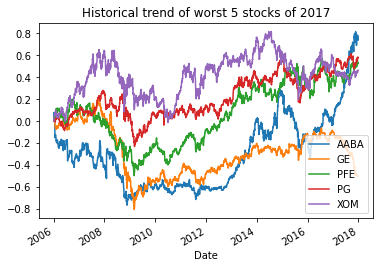

In [30]:
tdf[tdf.Name.isin(ws)].groupby('Name').Growth.plot(title='Historical trend of worst 5 stocks of 2017', legend=True)

Name
AAPL     AxesSubplot(0.125,0.2;0.775x0.68)
AMZN     AxesSubplot(0.125,0.2;0.775x0.68)
GOOGL    AxesSubplot(0.125,0.2;0.775x0.68)
MCD      AxesSubplot(0.125,0.2;0.775x0.68)
NKE      AxesSubplot(0.125,0.2;0.775x0.68)
Name: Growth, dtype: object

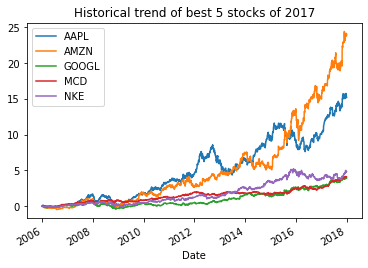

In [31]:
tdf[tdf.Name.isin(bs)].groupby('Name').Growth.plot(title='Historical trend of best 5 stocks of 2017', legend=True)

In [32]:
worst_stocks


,Date,Open,High,Low,Close,Volume,Name,Price,Growth
33217,2017-12-29,17.27,17.53,17.27,17.45,76149513,GE,17.380,-0.505794
30197,2017-12-29,84.00,84.20,83.64,83.64,8523411,XOM,83.870,0.460005
66434,2017-12-29,36.23,36.49,36.22,36.22,11421487,PFE,36.290,0.528805
69454,2017-12-29,92.24,92.46,91.88,91.88,4346675,PG,92.115,0.577109
93611,2017-12-29,69.79,70.13,69.43,69.85,6613070,AABA,69.800,0.738372


In [33]:
best_stocks

,Date,Open,High,Low,Close,Volume,Name,Price,Growth
90592,2017-12-29,1182.35,1184.00,1167.50,1169.47,2688391,AMZN,1175.83,23.865556
9058,2017-12-29,170.52,170.59,169.22,169.23,25999922,AAPL,169.89,15.172299
63414,2017-12-29,63.21,63.37,62.55,62.55,5222115,NKE,62.92,4.828624
54356,2017-12-29,172.98,172.98,171.92,172.12,2201771,MCD,172.50,4.099778
87573,2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL,1054.91,3.925631


#  try to find some corelation between the growth vs time of each stock in the dataset

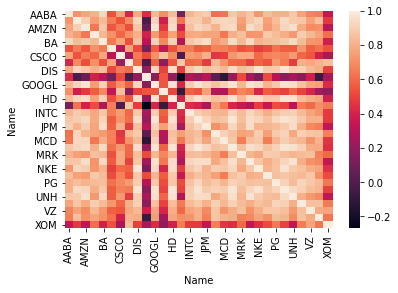

In [34]:
corr = df.pivot('Date', 'Name', 'Growth').corr()
sns.heatmap(corr)

# Although we can see some positive and negative corelations, the graph above is very dense. Let's us just focus on high positive and high negative corelations.# 

In [35]:
def unique_corelations(indices):
    mapping = {}
    for record in indices:
        (stock_a, stock_b) = record
        value_list = mapping.get(stock_a)
        if value_list:
            if stock_b not in value_list:
                value_list.append(stock_b)
                mapping.update({stock_a: value_list})
        else:
            mapping.update({stock_a: [stock_b]})

    return mapping

def filter_corelations_positive(corr, threshold=0.9):
    indices = np.where(corr > threshold)
    indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
    mapping = unique_corelations(indices)
    return mapping
    
def filter_corelations_negative(corr, threshold=-0.8):
    indices = np.where(corr < threshold)
    indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
    mapping = unique_corelations(indices)
    return mapping

In [36]:
filter_corelations_positive(corr, threshold=0.95)

{'AMZN': ['GOOGL', 'HD', 'MSFT', 'UNH'],
 'BA': ['JPM'],
 'DIS': ['HD', 'NKE', 'TRV'],
 'GOOGL': ['HD', 'JNJ', 'MMM', 'MSFT', 'TRV', 'UNH'],
 'HD': ['JNJ', 'MMM', 'NKE', 'TRV', 'UNH'],
 'JNJ': ['MMM', 'MSFT', 'TRV'],
 'JPM': ['MSFT'],
 'MMM': ['MSFT', 'TRV', 'UNH'],
 'MSFT': ['UNH'],
 'NKE': ['TRV']}

In [37]:
filter_corelations_negative(corr, -0.1)

{'GE': ['IBM', 'MCD']}

In [38]:
google_df = df[df.Name == 'GOOGL']

In [39]:
gdf = google_df[['Date', 'Price']].sort_values('Date')

# We will only use the Price column to forecast the future stock price for simplicity. We will ignore all of the other columns.

In [40]:
training_set = gdf[gdf.Date.dt.year != 2017].Price.values
test_set =  gdf[gdf.Date.dt.year == 2017].Price.values
print("Training set size: ",training_set.size)
print("Test set size: ", test_set.size)

Training set size:  2768
Test set size:  251


# As the amount of stock prices vary by a huge margin, we will scale the prices to be in the 0-1 range

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
training_set_scaled = scaler.fit_transform(training_set.reshape(-1, 1))

# For training, we will use previous 30 stock values to predict the stock price at time t. For this, we have to create our training and test set.

In [44]:
def create_train_data(training_set_scaled):
    X_train, y_train = [], []
    for i in range(30, training_set_scaled.size):
        X_train.append(training_set_scaled[i-30: i])
        y_train.append(training_set_scaled[i])
    # Converting list to numpy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    return X_train, y_train

In [45]:
X_train, y_train = create_train_data(training_set_scaled)


# Similarly, we'll create our test data set.

In [46]:
def create_test_data():
    X_test = []
    inputs = gdf[len(gdf) - len(test_set) - 30:].Price.values
    inputs = scaler.transform(inputs.reshape(-1, 1))
    for i in range(30, test_set.size+30): # Range of the number of values in the training dataset
        X_test.append(inputs[i - 30: i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    return X_test

In [47]:
X_test = create_test_data()

In [48]:
X_test.shape

(251, 30, 1)

# We will use a single LSTM layer.

In [49]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [50]:
def create_simple_model():
    model = Sequential()
    model.add(LSTM(units = 10, return_sequences = False, input_shape = (X_train.shape[1], 1)))
    model.add(Dense(units = 1))
    return model

# We now need to pick the optimizer for our model and a function to measure how well the model is doing i.e loss. We will pick RMSE as the loss function and Sigmoid Gradient Descent(SGD) as our optimizer with default learning rate(i.e 0.01)

In [51]:
def compile_and_run(model, epochs=50, batch_size=64):
    model.compile(metrics=['accuracy'], optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=3)
    return history

In [52]:
def plot_metrics(history):
    metrics_df = pd.DataFrame(data={"loss": history.history['loss']})
    metrics_df.plot()

In [53]:
simple_model = create_simple_model()
history = compile_and_run(simple_model, epochs=20)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


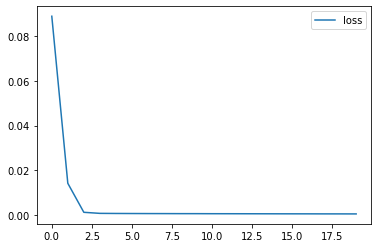

In [54]:
plot_metrics(history)

# Let us now use the model on the test set.

In [55]:
def make_predictions(X_test, model):
    y_pred = model.predict(X_test)
    final_predictions = scaler.inverse_transform(y_pred)
    fp = np.ndarray.flatten(final_predictions)
    ap = np.ndarray.flatten(test_set)
    pdf = pd.DataFrame(data={'Actual': ap, 'Predicted': fp})
    ax = pdf.plot()

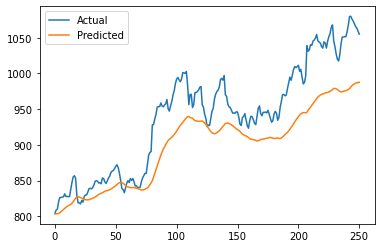

In [56]:
make_predictions(X_test, simple_model)

In [57]:
def create_dl_model():
    model = Sequential()

    # Adding the first LSTM layer
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

    # Adding a second LSTM layer
    model.add(LSTM(units = 50, return_sequences = True))
    
    # Adding a third LSTM layer
    model.add(LSTM(units = 50, return_sequences = True))

    # Adding a fourth LSTM layer
    model.add(LSTM(units = 50))

   # Adding the output layer
    model.add(Dense(units = 1))
    return model

In [58]:
dl_model = create_dl_model()
dl_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = compile_and_run(dl_model, epochs=20)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


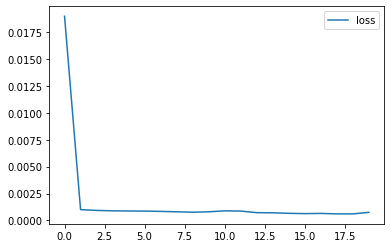

In [60]:
plot_metrics(history)

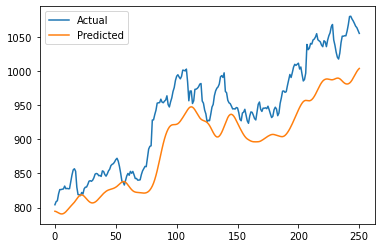

In [61]:
make_predictions(X_test, dl_model)

# Linear Regression

# We will first sort the dataset in ascending order and then create a separate dataset so that any new feature created does not affect the original data.

In [62]:
x = df.loc[:,'High':'Volume']
y = df.loc[:,'Open']
x.head()



,High,Low,Close,Volume
0,79.35,77.24,79.11,3117200
1,79.49,78.25,78.71,2558000
2,78.65,77.56,77.99,2529500
3,78.90,77.64,78.63,2479500
4,79.83,78.46,79.02,1845600


In [63]:
y.head()

0    77.76
1    79.49
2    78.41
3    78.64
4    78.50
Name: Open, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

In [65]:
LR = LinearRegression()

In [66]:
LR.fit(x_train,y_train)

LinearRegression()

In [67]:
LR.score(x_test,y_test)

0.9999574595345369

In [68]:
Classifier = DecisionTreeRegressor()

In [69]:
Classifier.fit(x_train,y_train)

DecisionTreeRegressor()

In [70]:
Classifier.score(x_test,y_test)

0.9999051376477796